# NOTEBOOK OBJECTIVE

In [372]:
# This notebook outlines the ML model using k-Nearest Neighbors algorithm. We will 
# 1. Load data, Explore data
# 2. Visualise the dataset
# 3. Determine the number of neighbours
# 4. Predict the colour of the fruit - apple, mandarin, orange, lemon

### Importing the key Python libraries

In [373]:
# The following set of commands will load the necessary Python libraries

# for linear algebra, random number capabilities
import numpy as np

# for data manipulation, analysis and reading our dataset
import pandas as pd

# for plotting and visualising the data
import matplotlib.pyplot as plt

# 1. IMPORT & EXPLORE DATA

### Load the data

In [374]:
# Now that we have imported the necessary libraries, we will now use the panda command to load our dataset, which in the CSV format. You can also load CSV, TXT etc.
# The file below is loaded from the same folder where the notebook is saved, and hence no file path is provided
fruit = pd.read_csv('fruit_data_with_colours.csv')

### Explore the data

In [375]:
# Now that the dataset is loaded, let's check the data and it's features using the head command
fruit.head()

# head function in python with no arguments gets the first five rows of data, and tail function the last 5
# head function with specified N arguments e.g. N = 10, gets the first 10 rows of data

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


### Determine the number of pieces of fruits(rows) and attributes(columns)

In [376]:
print(fruit.shape)

(59, 7)


### Determine the fruits within the data

In [377]:
# The fruit_data_with_colours.csv has total of seven columns which contains the information about fruits. 
# The information is nothing but features such as fruit_subtype, mass, width, height, colour_score
# In the table, using the head() function, we can only view apple and mandarin

print(fruit['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


### Determine the count of fruits within the data

In [378]:
# As the next step, need to determine how many fruits are present in our data

fruit['fruit_name'].value_counts()

# The result is count of each of the data within the unique fruit_name column
# We determined that there are four fruits, namely - apple, orange, lemon, mandarin, and each with count of entries

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

# 2. DATA VISUALISATION

### Visualise the data

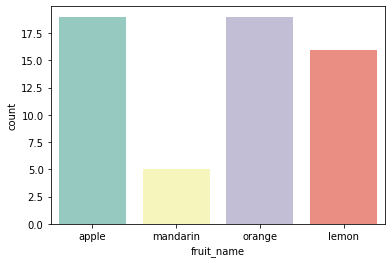

In [379]:
# Since we know the type of fruit and count, we will visualise it using a simple bar graph

# Seaborn is a data visualization library in Python based on matplotlib
import seaborn as sns

sns.countplot(fruit['fruit_name'], label="Count", palette="Set3")
plt.show()

### Visualise using Bloxplot (to assess the distribution)

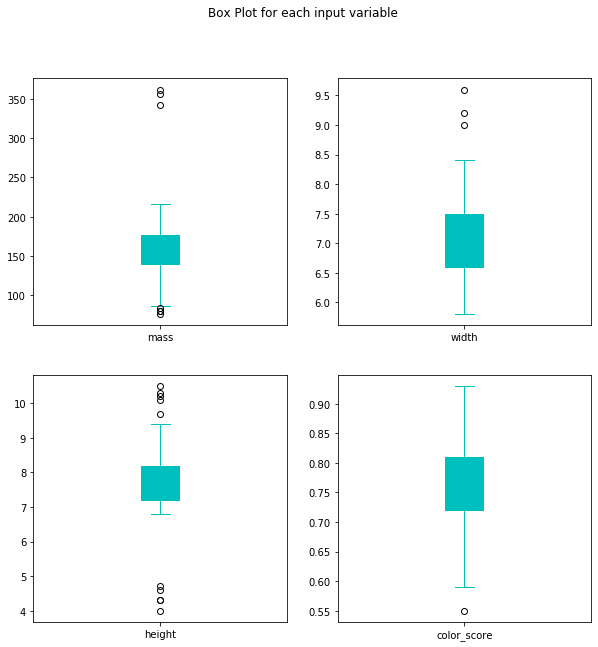

In [380]:
fruit.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), 
                                        sharex=False, sharey=False, figsize=(10,10), 
                                        color ='c', patch_artist=True)
pl.suptitle("Box Plot for each input variable")
plt.savefig('fruits_boxplot')
plt.show()

### Visualise using Histogram (to understand the distribution)

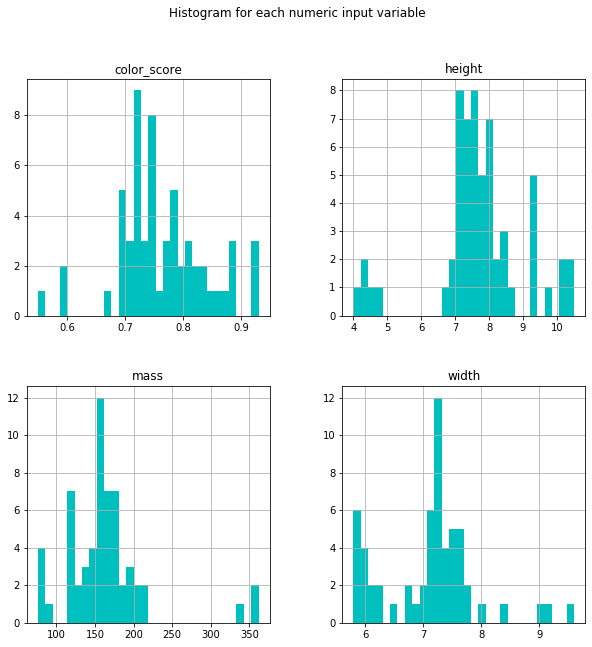

In [381]:
# PyLab is a module that belongs to the Python mathematics library Matplotlib. 
# PyLab combines the numerical module numpy with the graphical plotting module pyplot
import pylab as pl

# To create a histogram, we will use pandas hist() method.
fruit.drop('fruit_label', axis=1).hist(bins=30, figsize=(10,10), color = "c", ec = "m", lw=0)
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_histogram')
plt.show()

In [382]:
# The Gaussian distribution is also commonly called the "normal distribution" and is often described as a "bell-shaped curve".
# Colour_Score and Height seem to be closer to the Gaussian distribution

### Visualise using Scatter matrix

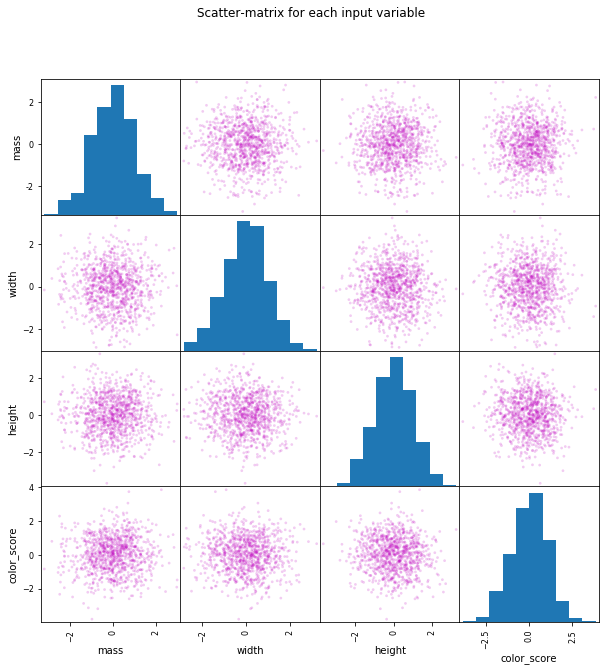

In [383]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
df = pd.DataFrame(np.random.randn(1000, 4), columns=['mass', 'width', 'height', 'color_score'])
scatter_matrix(df, alpha=0.2, cmap = cmap, figsize=(10,10), marker = '.', s=30, hist_kwds={'bins':10}, range_padding=0.05, color = 'm')
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruit_scatter_matrix')

# 3. K-Nearest Neighbors

### Build the KNN classifier model to determine K

In [384]:
# First, import the KNeighborsClassifier module
# details about the module here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# In order to understand the model performance, divide the dataset into a training set and a test set.
# The split is done by using the function train_test_split()
# details here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

In [385]:
# Split the dataset into two different datasets
# X for the independent features such as mass, width, height
# Y for the dependent feature i.e. fruit name
X = fruit[['mass','width','height','color_score']]
Y = fruit['fruit_name']

# Now split the dataset X into two separate sets — X_train and X_test 
# Similarly, split the dataset Y into two sets — y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Notice the use of test_size. This parameter decides the size of the data that has to be split as the test dataset
# In the above case it is 0.2, which means that the dataset will be split 20% as the test dataset

### Let's look at the statistical summary using describe() method

In [386]:
X_train.describe()

,mass,width,height,color_score
count,47.000000,47.000000,47.000000,47.000000
mean,160.170213,7.061702,7.661702,0.760638
std,51.830543,0.814956,1.329196,0.072424
min,76.000000,5.800000,4.000000,0.550000
25%,131.000000,6.250000,7.250000,0.720000
50%,158.000000,7.200000,7.600000,0.750000
75%,176.000000,7.500000,8.200000,0.810000
max,356.000000,9.200000,10.500000,0.920000


In [387]:
X_test.describe()

,mass,width,height,color_score
count,12.000000,12.000000,12.000000,12.000000
mean,174.666667,7.275000,7.816667,0.771667
std,67.410996,0.837882,1.535539,0.095426
min,84.000000,6.000000,4.600000,0.600000
25%,141.500000,7.050000,7.175000,0.717500
50%,160.000000,7.150000,7.550000,0.750000
75%,180.500000,7.325000,8.225000,0.810000
max,362.000000,9.600000,10.300000,0.930000


### Invoke the classifier and Training the model

In [388]:
# Now create a KNN classifier for making predictions
knn = KNeighborsClassifier()

# Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [389]:
# Note the output above that by default the n_neighbors = 5

### Evaluate the accuracy of the model for K=5

In [390]:
# Model Accuracy, how often is the classifier correct?
# Accuracy can be computed by comparing actual test set values and predicted values.
# The score function is simply a utility function for a default metric to be used within some algorithms of scikit-learn
knn.score(X_test, y_test)
print("Accuracy for K=5 : ", knn.score(X_test, y_test))

Accuracy for K=5 :  0.5833333333333334


In [391]:
# Well, we got a classification rate of 58.33%, which is good
# Now, let's increase the number of neighbors in the model and observe the accuracy

### Evaluate the accuracy of the model for K=6

In [392]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print("Accuracy for K=6 : ", knn.score(X_test, y_test))

Accuracy for K=6 :  0.6666666666666666


In [393]:
# We got a classification rate of 66.66%, which is even better

### Evaluate the accuracy of the model for K=7

In [394]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print("Accuracy for K=7 : ", knn.score(X_test, y_test))

Accuracy for K=7 :  0.6666666666666666


In [395]:
# Ok, we got a classification rate of 66.66%, which is same as K=6

### Evaluate the accuracy of the model for K=8

In [396]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print("Accuracy for K=8 : ", knn.score(X_test, y_test))

Accuracy for K=8 :  0.4166666666666667


In [397]:
# Great, we got a classification rate of 41.67%, so we decide the number of neighbors to be 7

### Data visualisation: Find the most appropriate K by plotting the accuracy for the various neighbours in a graph

In [398]:
neighbours = np.arange(1,10)
training_accuracy = np.empty(len(neighbours))
testing_accuracy = np.empty(len(neighbours))

In [399]:
for i in range(len(neighbours)):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(X_train,y_train)
    training_accuracy[i] = knn.score(X_train,y_train)
    testing_accuracy[i] = knn.score(X_test,y_test)

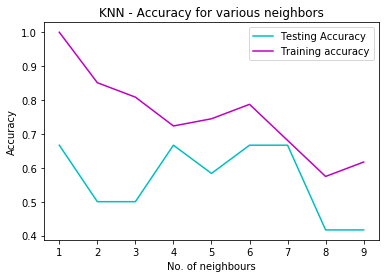

<Figure size 432x288 with 0 Axes>

In [400]:
plt.title('KNN - Accuracy for various neighbors')
plt.plot(neighbours, testing_accuracy, label = 'Testing Accuracy', color ='c')
plt.plot(neighbours, training_accuracy, label = 'Training accuracy', color ='m')
plt.legend()
plt.xlabel('No. of neighbours')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('knn - accuracy vs no of neighbours')

In [401]:
# From the above graph, we can say that the best fit value for K is either 6 of 7. Going by the accuracy, consider 7

### Conclusion

In [402]:
# As a result, we can say that using KNN algorithm with K=7, 
# we can estimate the "Colour" of a fruit from its "Mass", "Width", "Height","Color_Code" values with 66.67% accuracy

# 4. Plot the Decision Boundary of the k-NN Classifier

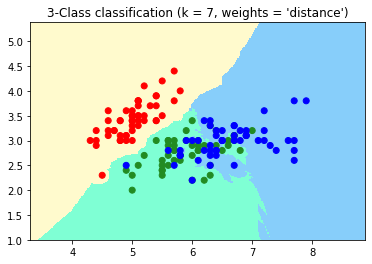

<Figure size 432x288 with 0 Axes>

In [403]:
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
from sklearn import neighbors, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could avoid this ugly slicing by using a two-dim dataset
y = iris.target
h = .02  # step size in the mesh

n_neighbors = 7

# Create color maps
cmap_light = ListedColormap(['#FFFACD', '#7FFFD4', '#87CEFA'])
cmap_bold = ListedColormap(['#FF0000', '#228B22', '#0000FF'])

for weights in ['distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
plt.show()
plt.savefig('classification chart')

### References: 

In [404]:
# Li, Susan (2017), https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2
# Navlani, Avinash (2018), https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
# https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib/45076236